In [1]:
# https://pypi.org/project/laserbeamsize/
import numpy as np
import imageio.v3 as iio
import laserbeamsize as lbs
import matplotlib.pyplot as plt
from PIL import Image

(2048, 2592)


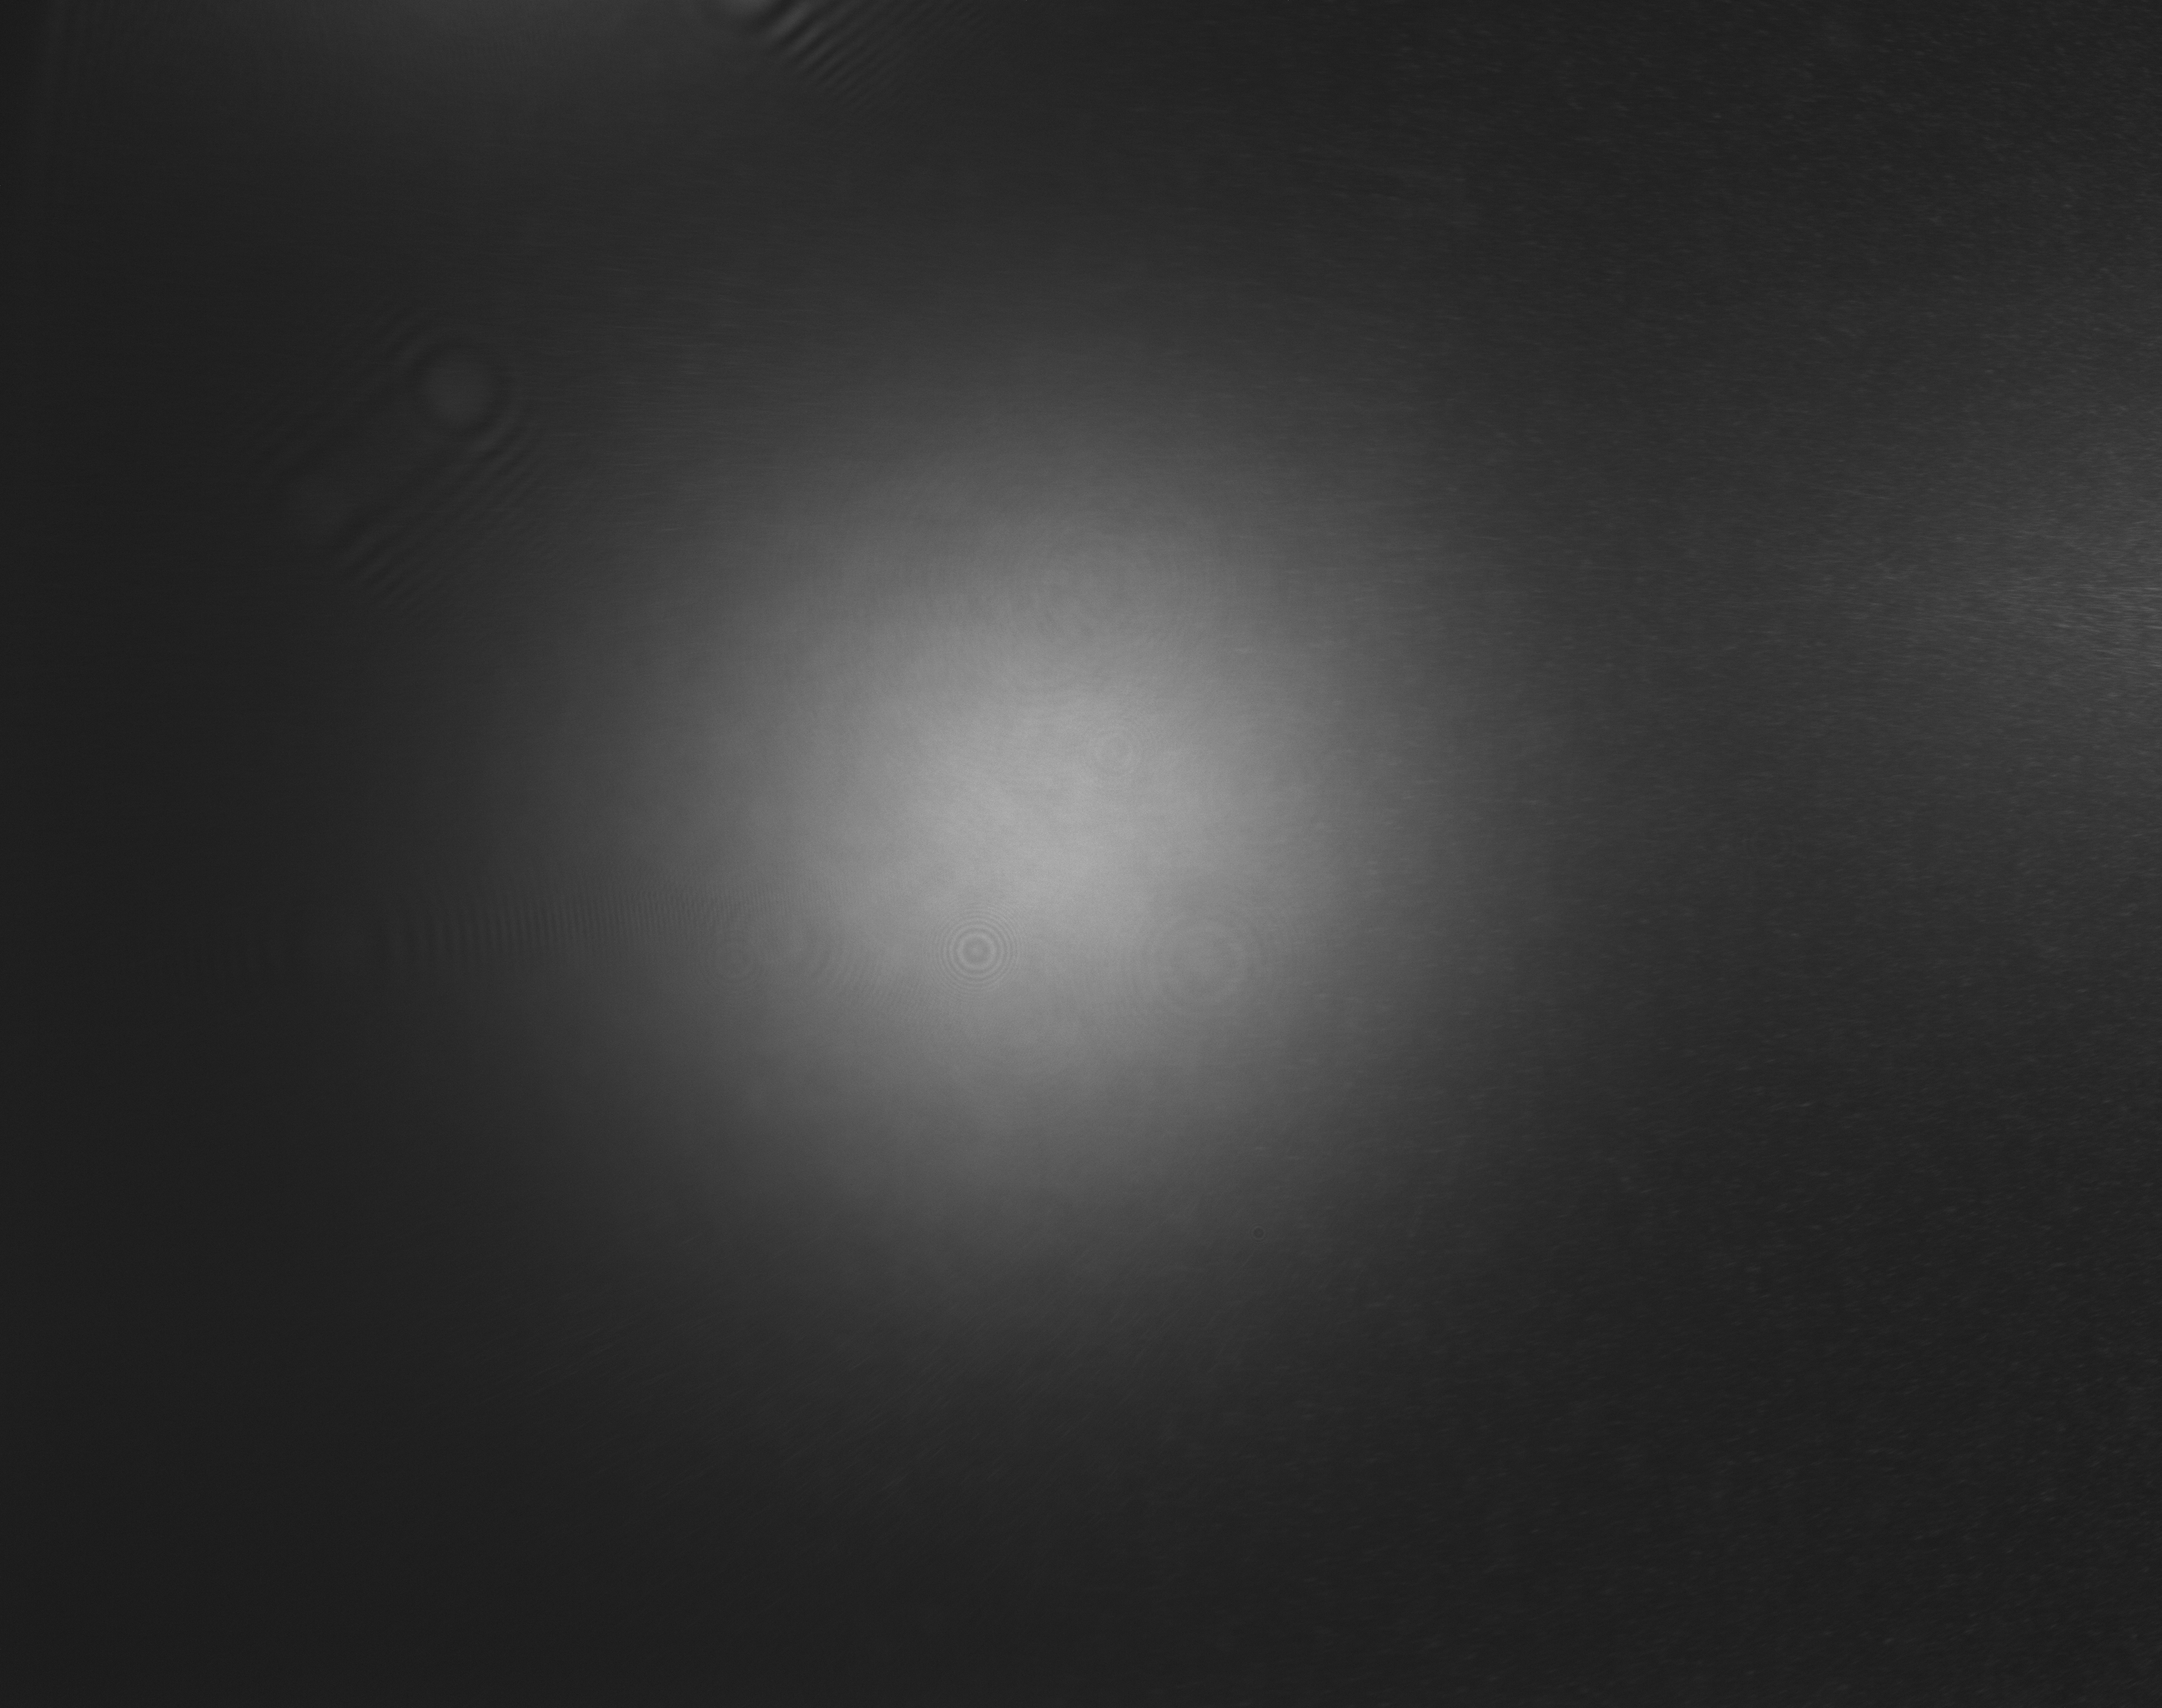

In [59]:
#file = "../beams/green_pointer.jpg"
#file = "../beams/green_pointer_ast.jpg"
#file = "../beams/beam_8b_ast.pgm"
#file = "../beams/beam_16b_ast.pgm"
#file = "../tmp/real_beams/test_image_46.png"
#file = "../tmp/real_beams/test_image_45.pgm"
file = "../tmp/real_beams/test_image_19.png"
#file = "../tmp/real_beams/test_image_44.png"

image = iio.imread(file)
print(image.shape)

# Convert to grayscale, laserbeamsize doesn't work with color images
if len(image.shape) > 2 and image.shape[2] == 3:
    gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    image = np.round(gray).astype(np.uint8)
    print(image.shape)

# Show image
Image.fromarray(image)

In [60]:
x, y, dx, dy, phi = lbs.beam_size(image, iso_noise=False)
#x, y, dx, dy, phi = lbs.basic_beam_size(image)
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

The center of the beam ellipse is at (1366, 940)
The ellipse diameter (closest to horizontal) is 1763 pixels
The ellipse diameter (closest to   vertical) is 1181 pixels
The ellipse is rotated 8° ccw from the horizontal


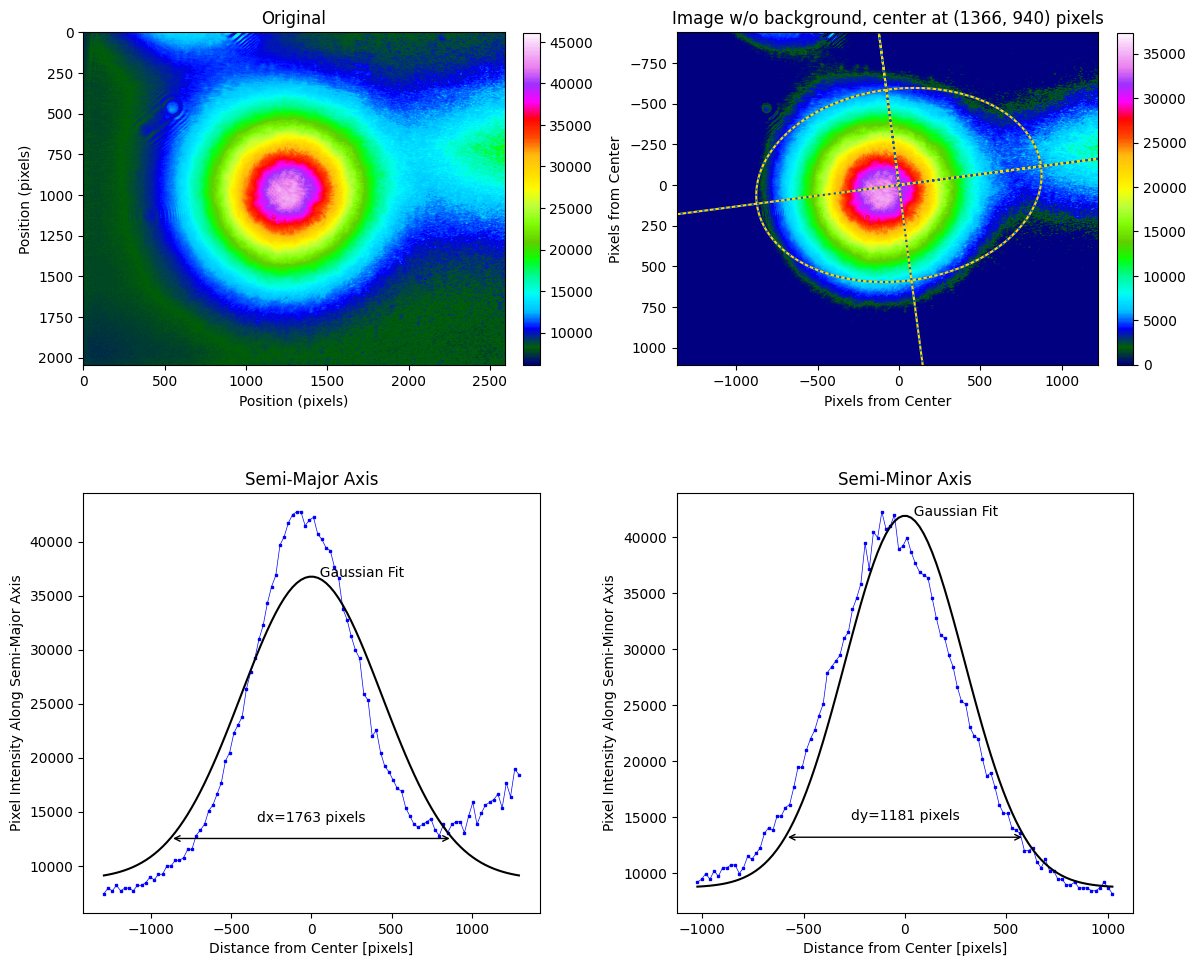

In [61]:
lbs.plot_image_analysis(image, iso_noise=False)